<a href="https://colab.research.google.com/github/isaimadoglu/german-traffic-sign-recognition/blob/isaWindows/GTSRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Colab library to upload files to notebook
from google.colab import files

In [0]:
# Install Kaggle library
!pip install -q kaggle

In [0]:
import os

In [4]:
# ls
print(os.getcwd())
print(os.listdir('../root'))

/content
['.profile', '.bashrc', '.kaggle', '.ipython', '.config', '.keras', '.cache', '.local', '.node-gyp', '.npm', '.jupyter', '.gsutil']


In [5]:
os.mkdir('/root/.kaggle')
os.chdir('/root/.kaggle')
print(os.getcwd())

FileExistsError: ignored

In [6]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
os.chdir('/content')
print(os.getcwd())
print(os.listdir('./'))

/content
['.config', 'meta', 'train', 'gtsrb-german-traffic-sign.zip', 'Train.csv', 'kaggle.json', 'Meta', 'Train', 'Meta.csv', 'Test.csv', 'Test', 'test', 'sample_data']


In [8]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
print(os.getcwd())
print(os.listdir('./'))

gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)
/content
['.config', 'meta', 'train', 'gtsrb-german-traffic-sign.zip', 'Train.csv', 'kaggle.json', 'Meta', 'Train', 'Meta.csv', 'Test.csv', 'Test', 'test', 'sample_data']


In [0]:
import zipfile

In [0]:
zipref = zipfile.ZipFile('gtsrb-german-traffic-sign.zip', 'r')
zipref.extractall()
zipref.close()

In [12]:
print(os.getcwd())
print(os.listdir('./'))

/content
['.config', 'meta', 'train', 'gtsrb-german-traffic-sign.zip', 'Train.csv', 'kaggle.json', 'Meta', 'Train', 'Meta.csv', 'Test.csv', 'Test', 'test', 'sample_data']


# **Training Part**

In [13]:
!pip install --upgrade pip
!pip install tensorflow

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)


In [14]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [15]:
import cv2
# Pillow modulu de OpenCV gibi, basit bir goruntu isleme modulu
from PIL import Image

import numpy as np
import pandas as pd

import random

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow.keras as keras
print("Tensorflow Version Should be 2.1: ", tf.__version__)
print("Keras Version: ", keras.__version__)

# Bunlar neural network kurulurken kullaniliyor
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense

from tensorflow.keras.utils import to_categorical

# makine ogrenmesinde train ve test datalarini ayiran fonksiyon
from sklearn.model_selection import train_test_split

Tensorflow Version Should be 2.1:  2.1.0
Keras Version:  2.2.4-tf


In [17]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

# image size'leri 30x30 seklinde kucultmek icin kullanacagiz.
height = 30
width = 30
# RGB icin
channels = 3
# sinif sayisi
num_classes = 43

# neural network input katmani icin??
n_inputs = height * width*channels

# NOT ALALIM
for i in range(num_classes) :
    path = "./train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    
    # For dongusu ile i'inci class'taki fotograflarin uzerinden geciyor.
    for a in Class:
        try:
            image=cv2.imread(path+a) # siradaki image'i imread ile okuyor.
            image_from_array = Image.fromarray(image, 'RGB')  # ???? https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
            size_image = image_from_array.resize((height, width))
            # image'lar data list'ine numpy array olarak append ediliyor.
            data.append(np.array(size_image))
            labels.append(i) # etiketler '0, 1, 2, 3, .. ,42' seklinde
        except AttributeError:
            print("Error! goruntuyu alamadik.")
            
x_train=np.array(data)
# Her bir piksel 0-255 araliginda deger aliyor ya. Ben bu degerleri 0-1 araligina normalize etmek istersem ne yaparim? 255'e bolerim.
x_train= x_train/255.0

y_train=np.array(labels)
# from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes) # Using one hot encoding

./train/0/
./train/1/
./train/2/
./train/3/
./train/4/
./train/5/
./train/6/
./train/7/
./train/8/
./train/9/
./train/10/
./train/11/
./train/12/
./train/13/
./train/14/
./train/15/
./train/16/
./train/17/
./train/18/
./train/19/
./train/20/
./train/21/
./train/22/
./train/23/
./train/24/
./train/25/
./train/26/
./train/27/
./train/28/
./train/29/
./train/30/
./train/31/
./train/32/
./train/33/
./train/34/
./train/35/
./train/36/
./train/37/
./train/38/
./train/39/
./train/40/
./train/41/
./train/42/


In [18]:
# Split Data
# from sklearn.model_selection import train_test_split
# X'ler veri, Y'ler label
X_train,X_valid,Y_train,Y_valid = train_test_split(x_train,y_train,test_size = 0.3,random_state=0) # X_valid = X_test olarak dusunebiliriz
print("Train :", X_train.shape)
print("Valid :", X_valid.shape)

Train : (27446, 30, 30, 3)
Valid : (11763, 30, 30, 3)


Train images


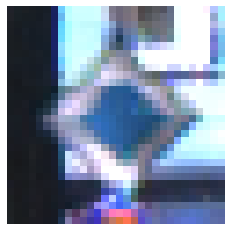

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


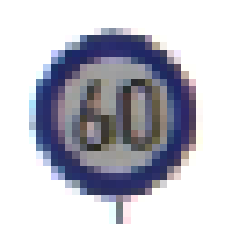

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


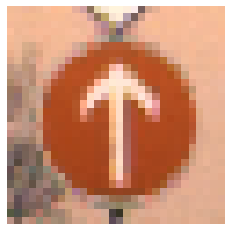

Size of this image is (30, 30, 3)
Class of the image is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
# Show Train images 
import matplotlib.pyplot as plt

def show_images(images, labels, amount):
    for i in range(amount):
        index = int(random.random() * len(images))
        plt.axis('off')
        plt.imshow(images[index])
        plt.show()       
        print("Size of this image is " + str(images[index].shape))
        print("Class of the image is " + str(labels[index]))

print("Train images")
show_images(X_train, Y_train, 3)

In [20]:
# Build Model
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:])) # input layer + convolution layer
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax')) # class'i belirleyen layer

model.summary() # ???

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [0]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train Model
epochs = 10
history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)

Train on 27446 samples, validate on 11763 samples
Epoch 1/10
27446/27446 [==============================] - 142s 5ms/sample - loss: 1.5726 - accuracy: 0.5517 - val_loss: 0.2591 - val_accuracy: 0.9268
Epoch 2/10
27446/27446 [==============================] - 141s 5ms/sample - loss: 0.3571 - accuracy: 0.8859 - val_loss: 0.0908 - val_accuracy: 0.9749
Epoch 3/10
20096/27446 [====================>.........] - ETA: 34s - loss: 0.2101 - accuracy: 0.9356

KeyboardInterrupt: ignored

In [0]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [0]:
# Predicting Test data 
y_test=pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../input/gtsrb-german-traffic-sign/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255  
pred = model.predict_classes(X_test)

In [0]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

In [0]:
print("pred: ", pred, " Type: ", type(pred), " shape: ", pred.shape)

In [0]:
print("X_test: ", X_test, " Type: ", type(X_test), " shape: ", X_test.shape)

In [0]:
first_in = 1
second_in = 2
class_of_prediction = model.predict_classes(X_test[first_in:second_in])[0]

In [0]:
class_of_prediction

In [0]:
sinif = 1
if(class_of_prediction == sinif):
    print("Birinci Sinif")